# Persiapan dataset gambar

In [1]:
import os, sys 
import warnings
import random
warnings.filterwarnings('ignore')
#deklarasi path data gambar yang sudah dilakukan editing sebelumnya
data_dir_list = os.listdir('edited/')
#Cetak nama folder (class) yang ada
print(data_dir_list)
path, dirs, files = next(os.walk("edited/"))
file_count = len(files)

['malam', 'pagi']


In [3]:
# Membuat direktori dasar yang baru bernama data fajar
original_dataset_dir = 'edited/'
base_dir = 'data-fajar/'
os.mkdir(base_dir)

In [4]:
#Membuat dua folder (train dan validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Di dalam folder train membuat 2 folder (pagi dan malam)
train_dir_pagi = os.path.join(train_dir, 'pagi')
os.mkdir(train_dir_pagi)
train_dir_malam = os.path.join(train_dir, 'malam')
os.mkdir(train_dir_malam)

#Di dalam folder validation membuat 2 folder (pagi dan malam)
validation_dir_pagi = os.path.join(validation_dir, 'pagi')
os.mkdir(validation_dir_pagi)
validation_dir_malam = os.path.join(validation_dir, 'malam')
os.mkdir(validation_dir_malam)

In [5]:
#Membuat fungsi split data untuk membagi data gambar yang ada menjadi 2 bagian, untuk training dan validation
from shutil import copyfile


def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " ternyata kosong, maka diabaikan.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [6]:
#Penentuan direktori training dan validation
#Deklarasi direktori sumber dan direktori dasar untuk class pagi (subuh)
SOURCE_DIR_PAGI = 'edited/pagi/'
TRAINING_DIR_PAGI = 'data-fajar/train/pagi/'
VALID_DIR_PAGI = 'data-fajar/validation/pagi/'

#Deklarasi direktori sumber dan direktori dasar untuk class malam (belum subuh) 
SOURCE_DIR_MALAM = 'edited/malam/'
TRAINING_DIR_MALAM = 'data-fajar/train/malam/'
VALID_DIR_MALAM = 'data-fajar/validation/malam/'

In [7]:
import os
import random
from shutil import copyfile

#Data training adalah 85% dan data validation 15%
split_size = .85

#Pemanggilan fungsi split untuk melakukan split data
split_data(SOURCE_DIR_PAGI, TRAINING_DIR_PAGI, VALID_DIR_PAGI, split_size)
split_data(SOURCE_DIR_MALAM, TRAINING_DIR_MALAM, VALID_DIR_MALAM, split_size)

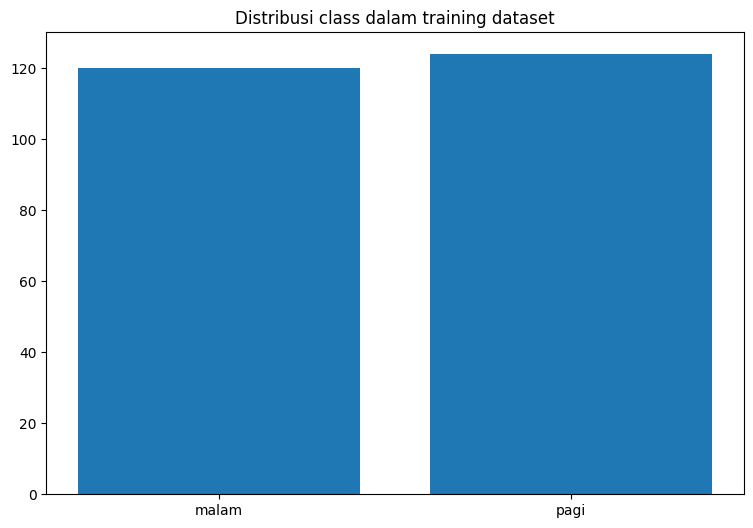

In [8]:
#Menampilkan grafik class data training
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['malam', 'pagi']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('data-fajar/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribusi class dalam training dataset')
plt.show()

In [9]:
#Menampilkan jumlah data training
for i in ['malam', 'pagi']:
    print('Gambar training {} ada : '.format(i)+str(len(os.listdir('data-fajar/train/'+i+'/'))))

Gambar training malam ada : 120
Gambar training pagi ada : 124


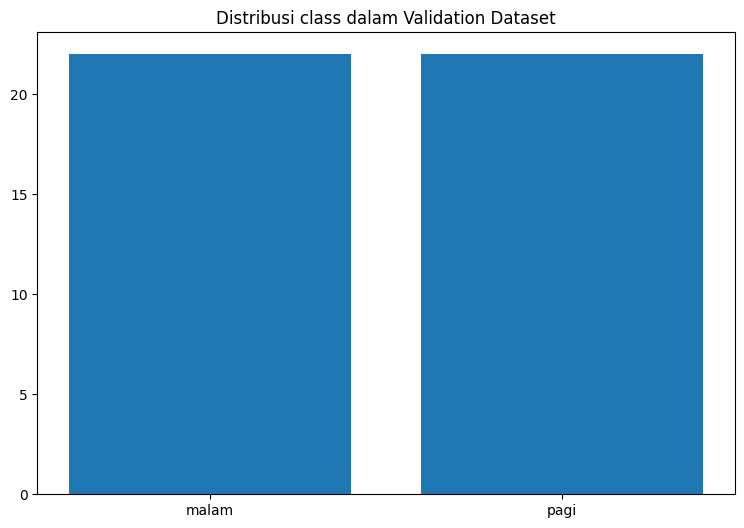

In [10]:
#Menampilkan grafik class data validation
image_folder = ['malam', 'pagi']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('data-fajar/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribusi class dalam Validation Dataset')
plt.show()

In [11]:
#Menampilkan jumlah data validation
for i in ['malam', 'pagi']:
    print('Gambar validasi {} ada : '.format(i)+str(len(os.listdir('data-fajar/validation/'+i+'/'))))

Gambar validasi malam ada : 22
Gambar validasi pagi ada : 22


# Deep Learning dengan Data Augumentation

In [12]:
#Import class-class dalam library tensorflow
#from tensorflow_estimator import Adam
from keras.optimizers import Adam
from keras_preprocessing.image import ImageDataGenerator, DirectoryIterator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
#Menentukan ukuran gambar yang dijadikan acuan untuk proses convolusi
img_width=128; img_height=128

In [14]:
#Augmentasi untuk data training (preprocessing)
TRAINING_DIR = 'data-fajar/train/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 244 images belonging to 2 classes.


In [15]:
#Augmentasi untuk data validation (preprocessing)
VALIDATION_DIR = 'data-fajar/validation/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 44 images belonging to 2 classes.


In [16]:
# Menyimpan otomatis model terbaik
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
best_model_file = 'model.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [17]:
#Pembuatan model/arsitektur Convolutional Neural Network (CNN)
model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128, 128, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary() # inspek model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                        

In [18]:
#Kompilasi model
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [19]:
#Proses training sekalius membuat histori untuk melihat progress akurasi disetiap epoch/iterasi
history = model.fit_generator(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/25
8/8 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5164
Epoch 1: val_accuracy improved from -inf to 0.52273, saving model to model.h5
8/8 [==============================] - 23s 1s/step - loss: 0.6933 - accuracy: 0.5164 - val_loss: 0.6899 - val_accuracy: 0.5227
Epoch 2/25
8/8 [==============================] - ETA: 0s - loss: 0.6433 - accuracy: 0.7213
Epoch 2: val_accuracy improved from 0.52273 to 0.70455, saving model to model.h5
8/8 [==============================] - 5s 642ms/step - loss: 0.6433 - accuracy: 0.7213 - val_loss: 0.5140 - val_accuracy: 0.7045
Epoch 3/25
8/8 [==============================] - ETA: 0s - loss: 0.5067 - accuracy: 0.7582
Epoch 3: val_accuracy did not improve from 0.70455
8/8 [==============================] - 5s 605ms/step - loss: 0.5067 - accuracy: 0.7582 - val_loss: 0.5308 - val_accuracy: 0.7045
Epoch 4/25
8/8 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.8361
Epoch 4: val_accuracy improved from 0

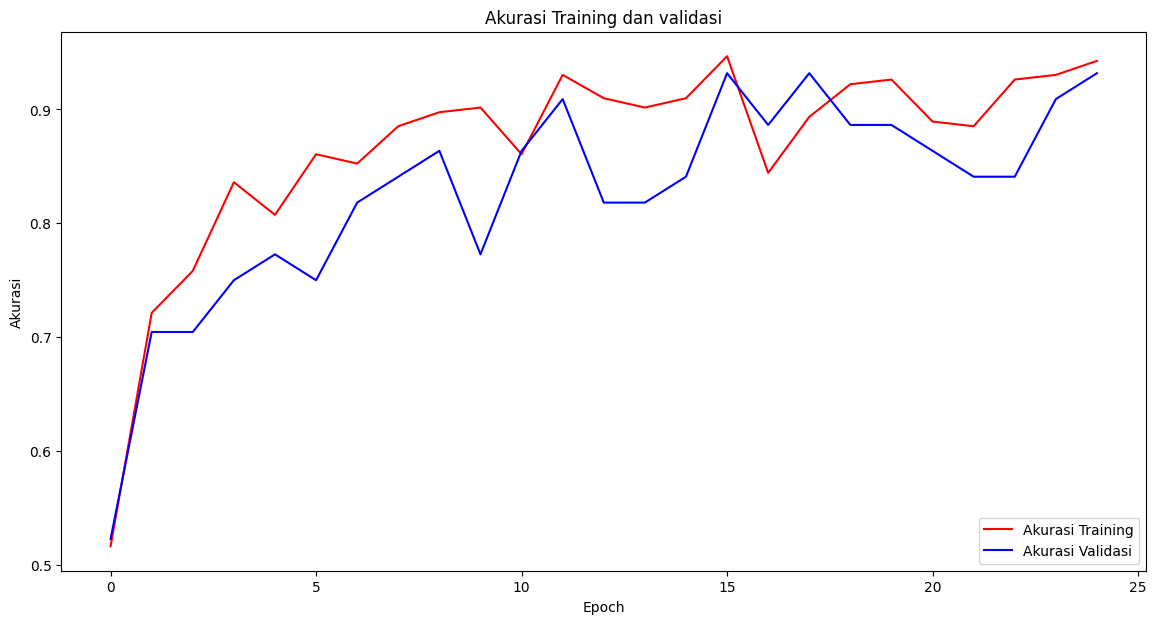

In [20]:
#Ploting histori proses training
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
fig.set_facecolor('white')
plt.plot(epochs, acc, 'r', label="Akurasi Training")
plt.plot(epochs, val_acc, 'b', label="Akurasi Validasi")
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Akurasi Training dan validasi')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Loss Training dan validasi')

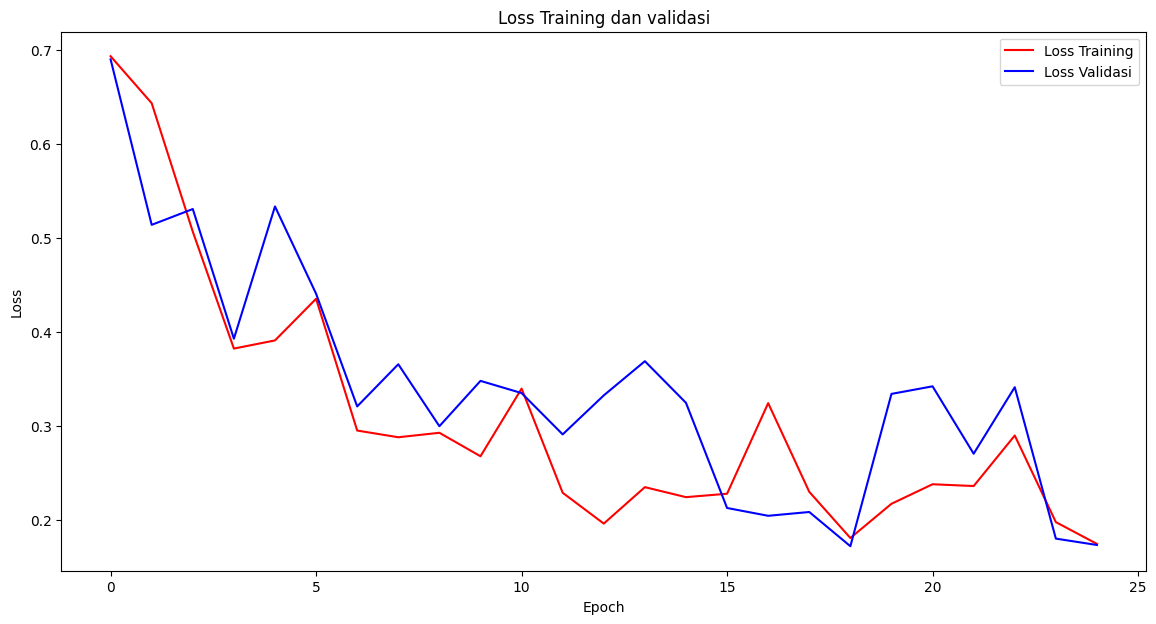

In [21]:
#Ploting histori proses validasi
fig2 = plt.figure(figsize=(14,7))
fig2.set_facecolor('white')
plt.plot(epochs, loss, 'r', label="Loss Training")
plt.plot(epochs, val_loss, 'b', label="Loss Validasi")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Training dan validasi')

In [22]:
## Test Performance on Test Data
import pandas as pd
import numpy as np
from keras_preprocessing.image import load_img, img_to_array

def preprocess_image(path):
    img = load_img(path, target_size = (img_height, img_width))
    a = img_to_array(img)
    a = np.expand_dims(a, axis = 0)
    a /= 255.
    return a

# Menguji performa dengan data test

In [23]:
# Membaca gambar test dan labelnya
test_images_dir = 'test/'
test_df = pd.read_csv('dataset/test.csv')

# Meletakkan gambar test pada list
test_dfToList = test_df['Image_id'].tolist()
test_ids = [str(item) for item in test_dfToList]

test_images = [test_images_dir+item for item in test_ids]
test_preprocessed_images = np.vstack([preprocess_image(fn) for fn in test_images])
np.save('test_preproc_CNN.npy', test_preprocessed_images)

In [24]:
test_df

,Image_id,labels
0,malam1.jpg,0
1,malam2.jpg,0
2,malam3.jpg,0
3,malam4.jpg,0
4,malam5.jpg,0
5,malam6.jpg,0
6,malam7.jpg,0
7,malam8.jpg,0
8,pagi1.jpg,1
9,pagi2.jpg,1


In [25]:
# Prediksi gambar tes
array = model.predict(test_preprocessed_images, batch_size=1, verbose=1)
#x = model.predict()
answer = np.argmax(array, axis=1)
print(answer)

16/16 [==============================] - 1s 14ms/step
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [26]:
# Menyimpan label ke dalam array untuk dibuat confusion matriks
y_true = test_df['labels']
y_pred = array
print(y_true)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: labels, dtype: int64


In [27]:
# Membuat confusion matriks sederhana
from sklearn.metrics import log_loss
loss = log_loss(y_true, y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)

In [28]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true, answer)
conf_mat

array([[8, 0],
       [0, 8]], dtype=int64)

In [29]:
train_dir = 'data-fajar/train/'
classes = os.listdir(train_dir)

In [30]:
# Fungsi untuk memploting confusion matriks secara grafis
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = cm.round(2)
        #print("Normalized confusion matrix")
    else:
        cm=cm
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

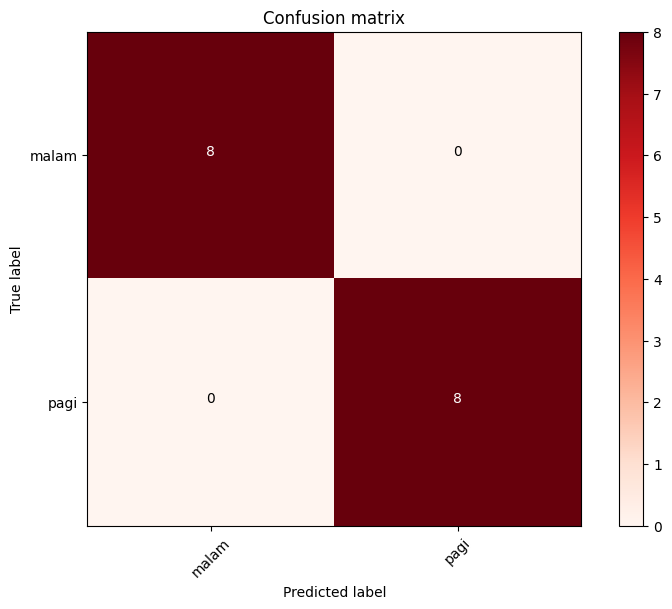

In [31]:
# Ploting confusion matriks
np.set_printoptions(precision=2)
fig1 = plt.figure(figsize=(8,6))
fig1.set_facecolor('white')
plot_confusion_matrix(conf_mat, classes=classes, title='Confusion matrix')
plt.show()